# Task 1 – Context

This task sets the stage for the subsequent tasks as it determines the context for the experiments. For
that purpose:
1. You present a real scenario or a (realistic) fictitious situation, in which you are the data scientist.
You propose to solve a classification or regression problem and want to convince a customer
to greenlight your project.

The churn rate in businesses describes the percentage of customers leaving a subscription service over a time period. For the companies that offer these subsciption models it is common practize to monitor customer behavior to determine the likelihood of a customer to cancel their subscription to then offer special benefits so keep those customers that have a high dropout risk rate and keep the churn rate low. Similarly Universities offer a special type of subscription model in which Students pay their tuition fee to participate in courses and achieve degrees. By determining Students at high risks early, universities can intervene to support these students and offer targeted support. The Dataset presented in this project includes different features for students from different universities around the world and if they dropped out of university at the end of a normal course duration. Analysing this dataset and building a model to predict students that are likely to dropout can help universities to intervene and support students before they actually dropout.


2. You explain the value (monetary or otherwise) of solving the problem and what the customer
could do with the model you train (if successful).

Solving this task of correctly classifying student dropout to support them as soon as possible helps the students as well as the University. 
Preventing dropouts will increase the tuition revenue and keeps the costs that comes with the enrollment of new students low. Especially private Universities that are highly dependend on the students tuitions could greatly benefit from these predictions. 
For the students that might be classified as a potential dropout, they could also benefit because they might receive personalied support, like tutoring, counseling, or financial support. This approach can lead to better academic performance and a higher likelihood of successfully completing their education. 

3. Name two quality criteria that you will use in the following tasks to evaluate your models.
Explain your choice!

**F1 score for dropout** (calculated on the dropout class): Dropout prediction often involves an imbalance between "dropout" and "non-dropout" cases where there are more of the latter. The [F1 score balances precision and recall](https://www.v7labs.com/blog/f1-score-guide), which makes it a good metric for imbalanced datasets and ensuring the model accurately identifies at-risk students. The F1 score is calculated as follows: 
$$F1 = \frac{2 \cdot TP}{2 \cdot TP + FP + FN}$$

Where:
- **TP**: True Dropout Positives
- **FP**: False Dropout Positives
- **FN**: False Dropout Negatives

**Accuracy**: While the F1 score already includes class imbalances, the accuracy score for classification will give a good measurment of the models actual performance.

dataset: [M.V.Martins, D. Tolledo, J. Machado, L. M.T. Baptista, V.Realinho. (2021) "Early prediction of student’s performance in higher education: a case study" Trends and Applications in Information Systems and Technologies, vol.1, in Advances in Intelligent Systems and Computing series. Springer. DOI: 10.1007/978-3-030-72657-7_16](https://archive.ics.uci.edu/dataset/697/predict+students+dropout+and+academic+success)
___

# Task 2 – The Data
Load and present a dataset (respect the conditions in Section 2). This will be the raw data, that you’ll
exploit in the subsequent tasks.


• Explain how the dataset is suitable for the project from Task 1
___

The data comes from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/) and can be loaded with the ucimlrepo library with the id 697. 

"This dataset is licensed under a [Creative Commons Attribution 4.0 International](https://creativecommons.org/licenses/by/4.0/legalcode) (CC BY 4.0) license."

In [1]:
from ucimlrepo import fetch_ucirepo 
import pandas as pd

In [2]:
# fetch dataset 
predict_students_dropout_and_academic_success = fetch_ucirepo(id=697) 
  
# data
X = predict_students_dropout_and_academic_success.data.features 
y = predict_students_dropout_and_academic_success.data.targets 

# Combine the features and target into one DataFrame
df = pd.concat([X, y], axis=1)
df.head()

,Marital Status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


# Data Description

The dataset consists of **4424 students** from different University around the world. There are **37 variables** measured for each student, with no missing values. These variables Demographic variables like the students age their sex as well as information about the parents, academic variables like the students high school GPA, behavioral variables from the university like the amount of credits they achieved in the first or second semester, as well as their first grades or if they already payed the tuition fee, economic variables like the countries GDP at that time or the inflation rate, and the target variable that describes if the student graduated, is still enrolled or if they dropped out.  
___

Further down, the values of each feature are described in detail.


| Feature | Description |
|----------|-------------|
| **Student Information** |  |
| Age at Enrollment | Age when starting program |
| Gender | Male (1), Female (0) |
| Marital Status | Single (1), Married (2), Widower (3), Divorced (4), Union (5), Separated (6) |
| Nationality | Country code (e.g., 1: Portuguese) |
| International | Yes (1), No (0) |
| Displaced | Lives far from residence - Yes (1), No (0) |
| **Academic** |  |
| Previous Qualification | Secondary (1) to Doctorate (5) |
| Previous Grade | Score 0-200 |
| Admission Grade | Entry score 0-200 |
| Application Order | First choice (0) to Last (9) |
| Course | Program code (e.g., 33: Biofuel Tech) |
| Schedule | Daytime (1), Evening (0) |
| Special Needs | Yes (1), No (0) |
| **Family** |  |
| Parents' Education | Secondary (1) to Doctorate (44) |
| Parents' Occupation | Senior roles (1) to Unskilled (9) |
| **Financial** |  |
| Scholarship | Yes (1), No (0) |
| Tuition Status | Up to date (1), No (0) |
| Debt | Outstanding fees - Yes (1), No (0) |
| **Performance** |  |
| 1st Semester Units | Enrolled, credited, evaluated, passed |
| 1st Semester Grade | Average 0-20 |
| 2nd Semester Units | Enrolled, credited, evaluated, passed |
| 2nd Semester Grade | Average 0-20 |
| **Economic** |  |
| Unemployment Rate | Percentage |
| Inflation Rate | Percentage |
| GDP | Value during enrollment |
| **Target** | Dropout, Enrolled, Graduate |

More information about the categorical integer meaning can be found [here](https://archive.ics.uci.edu/dataset/697/predict+students+dropout+and+academic+success)


___
# Task 3 – IDA
Conduct an initial data analysis.

• Present some relevant statistical properties that inform the reader about the dataset or that are
relevant for your project.

___

In [3]:
# Display statistical properties for numerical features
print(X.describe(), X.info())

# Display value counts for the target variable
print(y['Target'].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 36 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital Status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

In [4]:
# Check for NA values in df
print(df.isna().sum().sum())

0


We see, that all variables are int variables or floats, even the categorical ones. Later those should be converted to a dummy converted dataframe. We also see the range of the variables indicating they have different ranges which will likely be normalized for model prediction. The last info that we see in this initial data analyses is that we don't have any missing values. 

___
# Task 4 – EDA and Preprocessing
Bring the dataset into the form that you need for the experiments.

• Explore the data and conduct necessary transformations.

• Visualize or summarize aspects of the dataset (statistics, ranges, distributions, . . . ).

• If necessary, use different means of preprocessing until the dataset is suitable.

• If you change data, do not forget to present and summarize relevant properties and distributions
of the result.
___

In [5]:
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px
from scipy.stats import pearsonr
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler



# Data cleaning:

For Convenience some columns will be renamed to make it easier to work with. We also save the categorical variables into a list to later encode them differently.

In [6]:
# Rename columns to match the correct names
df.rename(columns = {"Nacionality": "Nationality", 
                           "Mother's qualification": "Mother_qualification", 
                           "Father's qualification": "Father_qualification", 
                           "Mother's occupation": "Mother_occupation",
                           "Father's occupation": "Father_occupation", 
                           "Age at enrollment": "Age"}, inplace = True)

# Replace spaces with underscores in column names
df.columns = df.columns.str.replace(' ', '_')

# Convert specified columns to categorical
categorical_features = ['Marital_Status', 'Application_mode', 'Application_order', 'Course',
                        'Daytime/evening_attendance', 'Previous_qualification', 'Nationality',
                        'Mother_qualification', 'Father_qualification', 'Mother_occupation',
                        'Father_occupation', 'Displaced', 'Educational_special_needs', 'Debtor',
                        'Tuition_fees_up_to_date', 'Gender', 'Scholarship_holder', 'International']



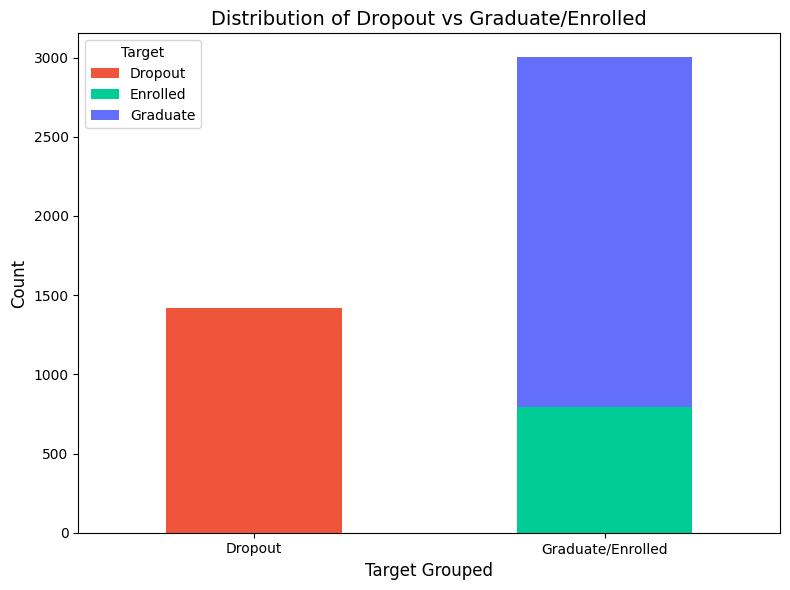

In [7]:
# Create a new column to group "Graduate" and "Enrolled" together
y = y.copy() # to avoid SettingWithCopyWarning
y['Target_Grouped'] = y['Target'].apply(lambda x: 'Graduate/Enrolled' if x != 'Dropout' else 'Dropout')

# Group and count the data
group_counts = y.groupby(['Target_Grouped', 'Target']).size().unstack(fill_value=0)

# Plot the data as a stacked bar chart
fig, ax = plt.subplots(figsize=(8, 6))
group_counts.plot(kind='bar', stacked=True, color=['#EF553B', '#00CC96', '#636EFA'], ax=ax)

# Customize the plot
plt.title('Distribution of Dropout vs Graduate/Enrolled', fontsize=14)
plt.xlabel('Target Grouped', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=0, fontsize=10)
plt.legend(title='Target', fontsize=10)
plt.tight_layout()

plt.show()


As we already saw in the IDA there are a lot more non dropouts then dropouts. This class imbalance is something we have to later keep in mind for the quality criteria we choose as well as the stratification that we have to apply for sample selection. 
The dataset also distinguishes between graduated students and still enrolled students. For this project we focus on the people that dropped out and therefor merge the other two.

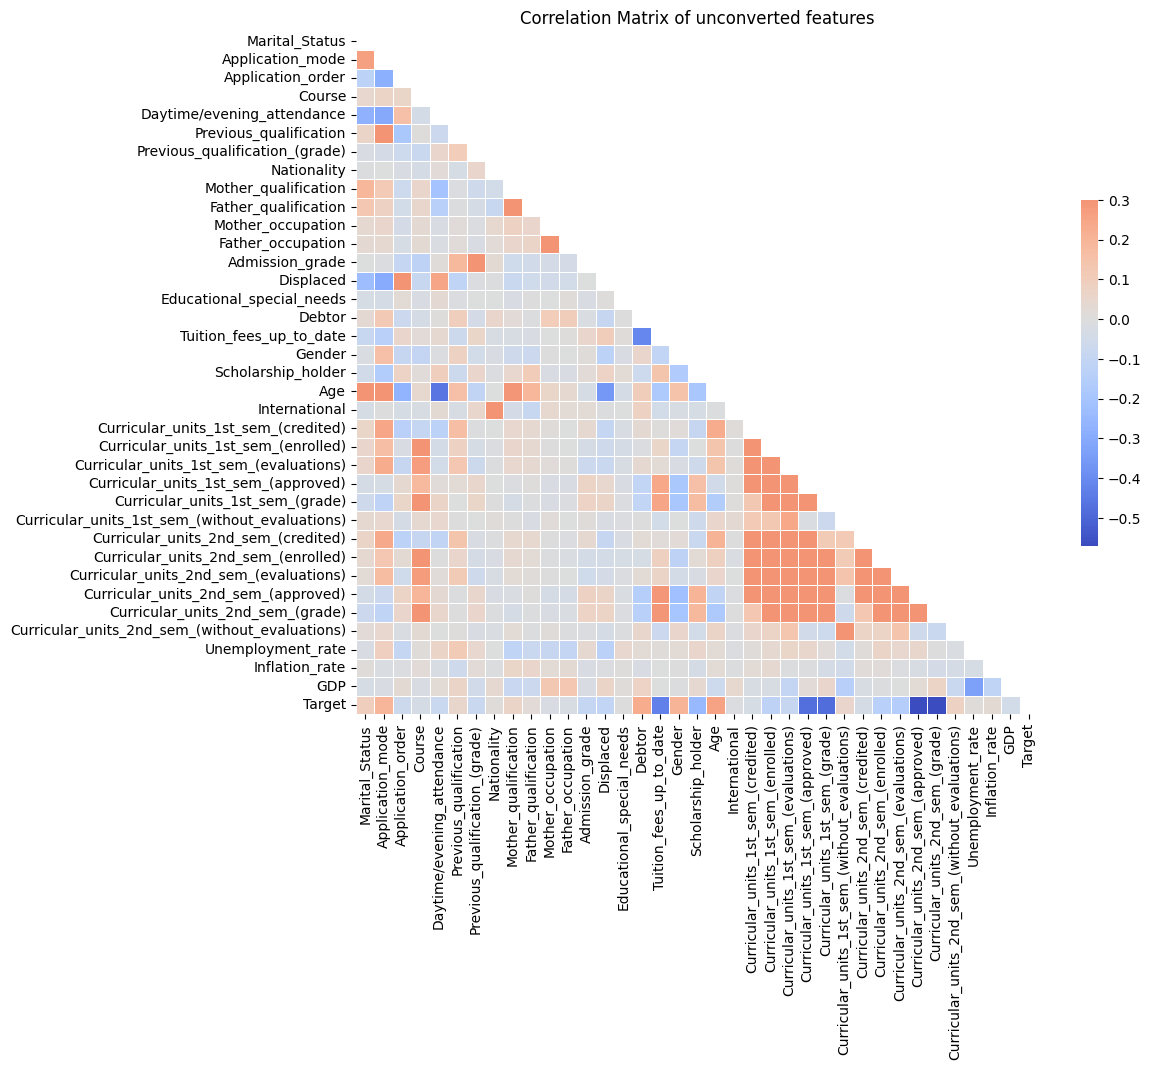

In [8]:
# Encode the target variable
df['Target'] = df['Target'].apply(lambda x: 1 if x == 'Dropout' else 0)

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_matrix, cmap='coolwarm', mask=mask, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=False)

plt.title('Correlation Matrix of unconverted features')
plt.show()

In this initial Correlation matrix we see that we have correlations of up to .3 and as low as -.5 Most of the features related to student university behavior are correlated and out Target variable shows some positive and negative correlations to other variables that we are further going to analyse. Because visibility reasons, I didn't yet convert the categorical variables to dummy encodings, so most of the categorical variables that aren't binary aren't relevant in this matrix. 

In [9]:
# Get dummies for the categorical features
df_with_dummies = pd.get_dummies(df, columns=categorical_features, drop_first=True)
y_dummies = df_with_dummies['Target']

df_with_dummies.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Columns: 245 entries, Previous_qualification_(grade) to International_1
dtypes: bool(226), float64(7), int64(12)
memory usage: 1.6 MB


The dummy encoding increased the df from 37 features to 245. From the variable description most of these new features are specific parental qualifications, occupations or courses. Later we will only keep the new features that have a significant correlation with the target variable.

In [10]:
# Calculate the correlation matrix using dummies data
correlation_matrix_dummies = df_with_dummies.corr()

# Calculate the correlations with the target variable
correlations_dummies = correlation_matrix_dummies['Target'].drop('Target').sort_values(ascending=False)

# Print the highest correlations with the target variable
print("Fifteen highest correlations with target (using dummies):")
print(correlations_dummies.head(15))

# Print the lowest correlations with the target variable
print("Fiften lowest correlations with target (using dummies):")
print(correlations_dummies.tail(15))


Fifteen highest correlations with target (using dummies):
Age                          0.254215
Application_mode_39          0.231699
Debtor_1                     0.229407
Gender_1                     0.203983
Mother_qualification_34      0.155484
Father_qualification_34      0.138755
Previous_qualification_19    0.133933
Application_mode_7           0.111978
Mother_occupation_90         0.110620
Course_9991                  0.101295
Father_occupation_90         0.101075
Previous_qualification_3     0.100485
Marital_Status_2             0.099048
Course_9119                  0.094175
Course_9130                  0.090145
Name: Target, dtype: float64
Fiften lowest correlations with target (using dummies):
Daytime/evening_attendance_1             -0.080499
Course_9238                              -0.087361
Curricular_units_1st_sem_(evaluations)   -0.090125
Admission_grade                          -0.095806
Displaced_1                              -0.107232
Curricular_units_1st_sem_(enroll

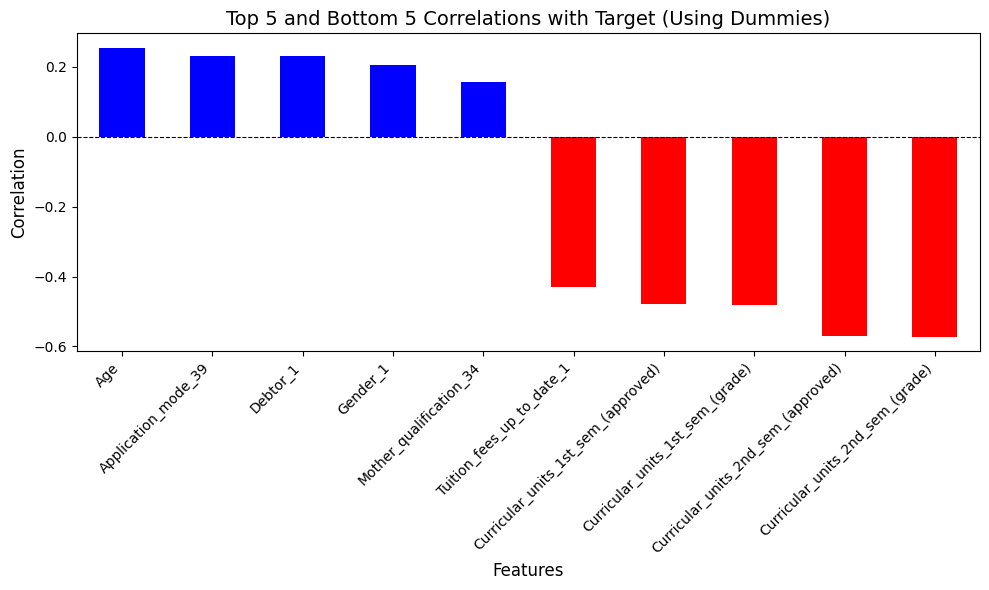

In [11]:
# Combine the top 5 and bottom 5 correlations
correlations_combined = pd.concat([correlations_dummies.head(5), correlations_dummies.tail(5)])

# Create the plot
plt.figure(figsize=(10, 6))
correlations_combined.plot(kind='bar', color=['blue'] * 5 + ['red'] * 5)
plt.title('Top 5 and Bottom 5 Correlations with Target (Using Dummies)', fontsize=14)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Correlation', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.axhline(0, color='black', linewidth=0.8, linestyle='--')
plt.tight_layout()
plt.show()


Application_mode_39 = Over 23 years old 
Deptor_1 = yes
Gender_1 = male
Mother_qualification_34 = Unknown
Tuition_fees_up_to_date_1 = yes

Now after dummy encoding the variables we see, that some specific variables that were before categorically encoded now have one of the highest positive correlations. 
Age seems to be positively correlated, meaning that older people are also more likely to drop out. The application more 39 is also just some coding for people over 23. People who owe money to the university also seem dropout more, male people are more likely to be dropouts compared to woman and if the mothers qualification is unknown. Most of the negatively correlated features seem to relate to the university behaviour which makes sense because of someone dropped out after the first semester they aren't going to have any feature values for the second semester. If the tuition fees are up to date also seemed to correlate with the dropout rate.  

Some of these highest and lowest feature encode demographic variables, others financial and the ones with the biggest total correlation are the behavioral features in the first and second semester. 


c:\Users\TimPr\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\TimPr\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\TimPr\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\TimPr\App

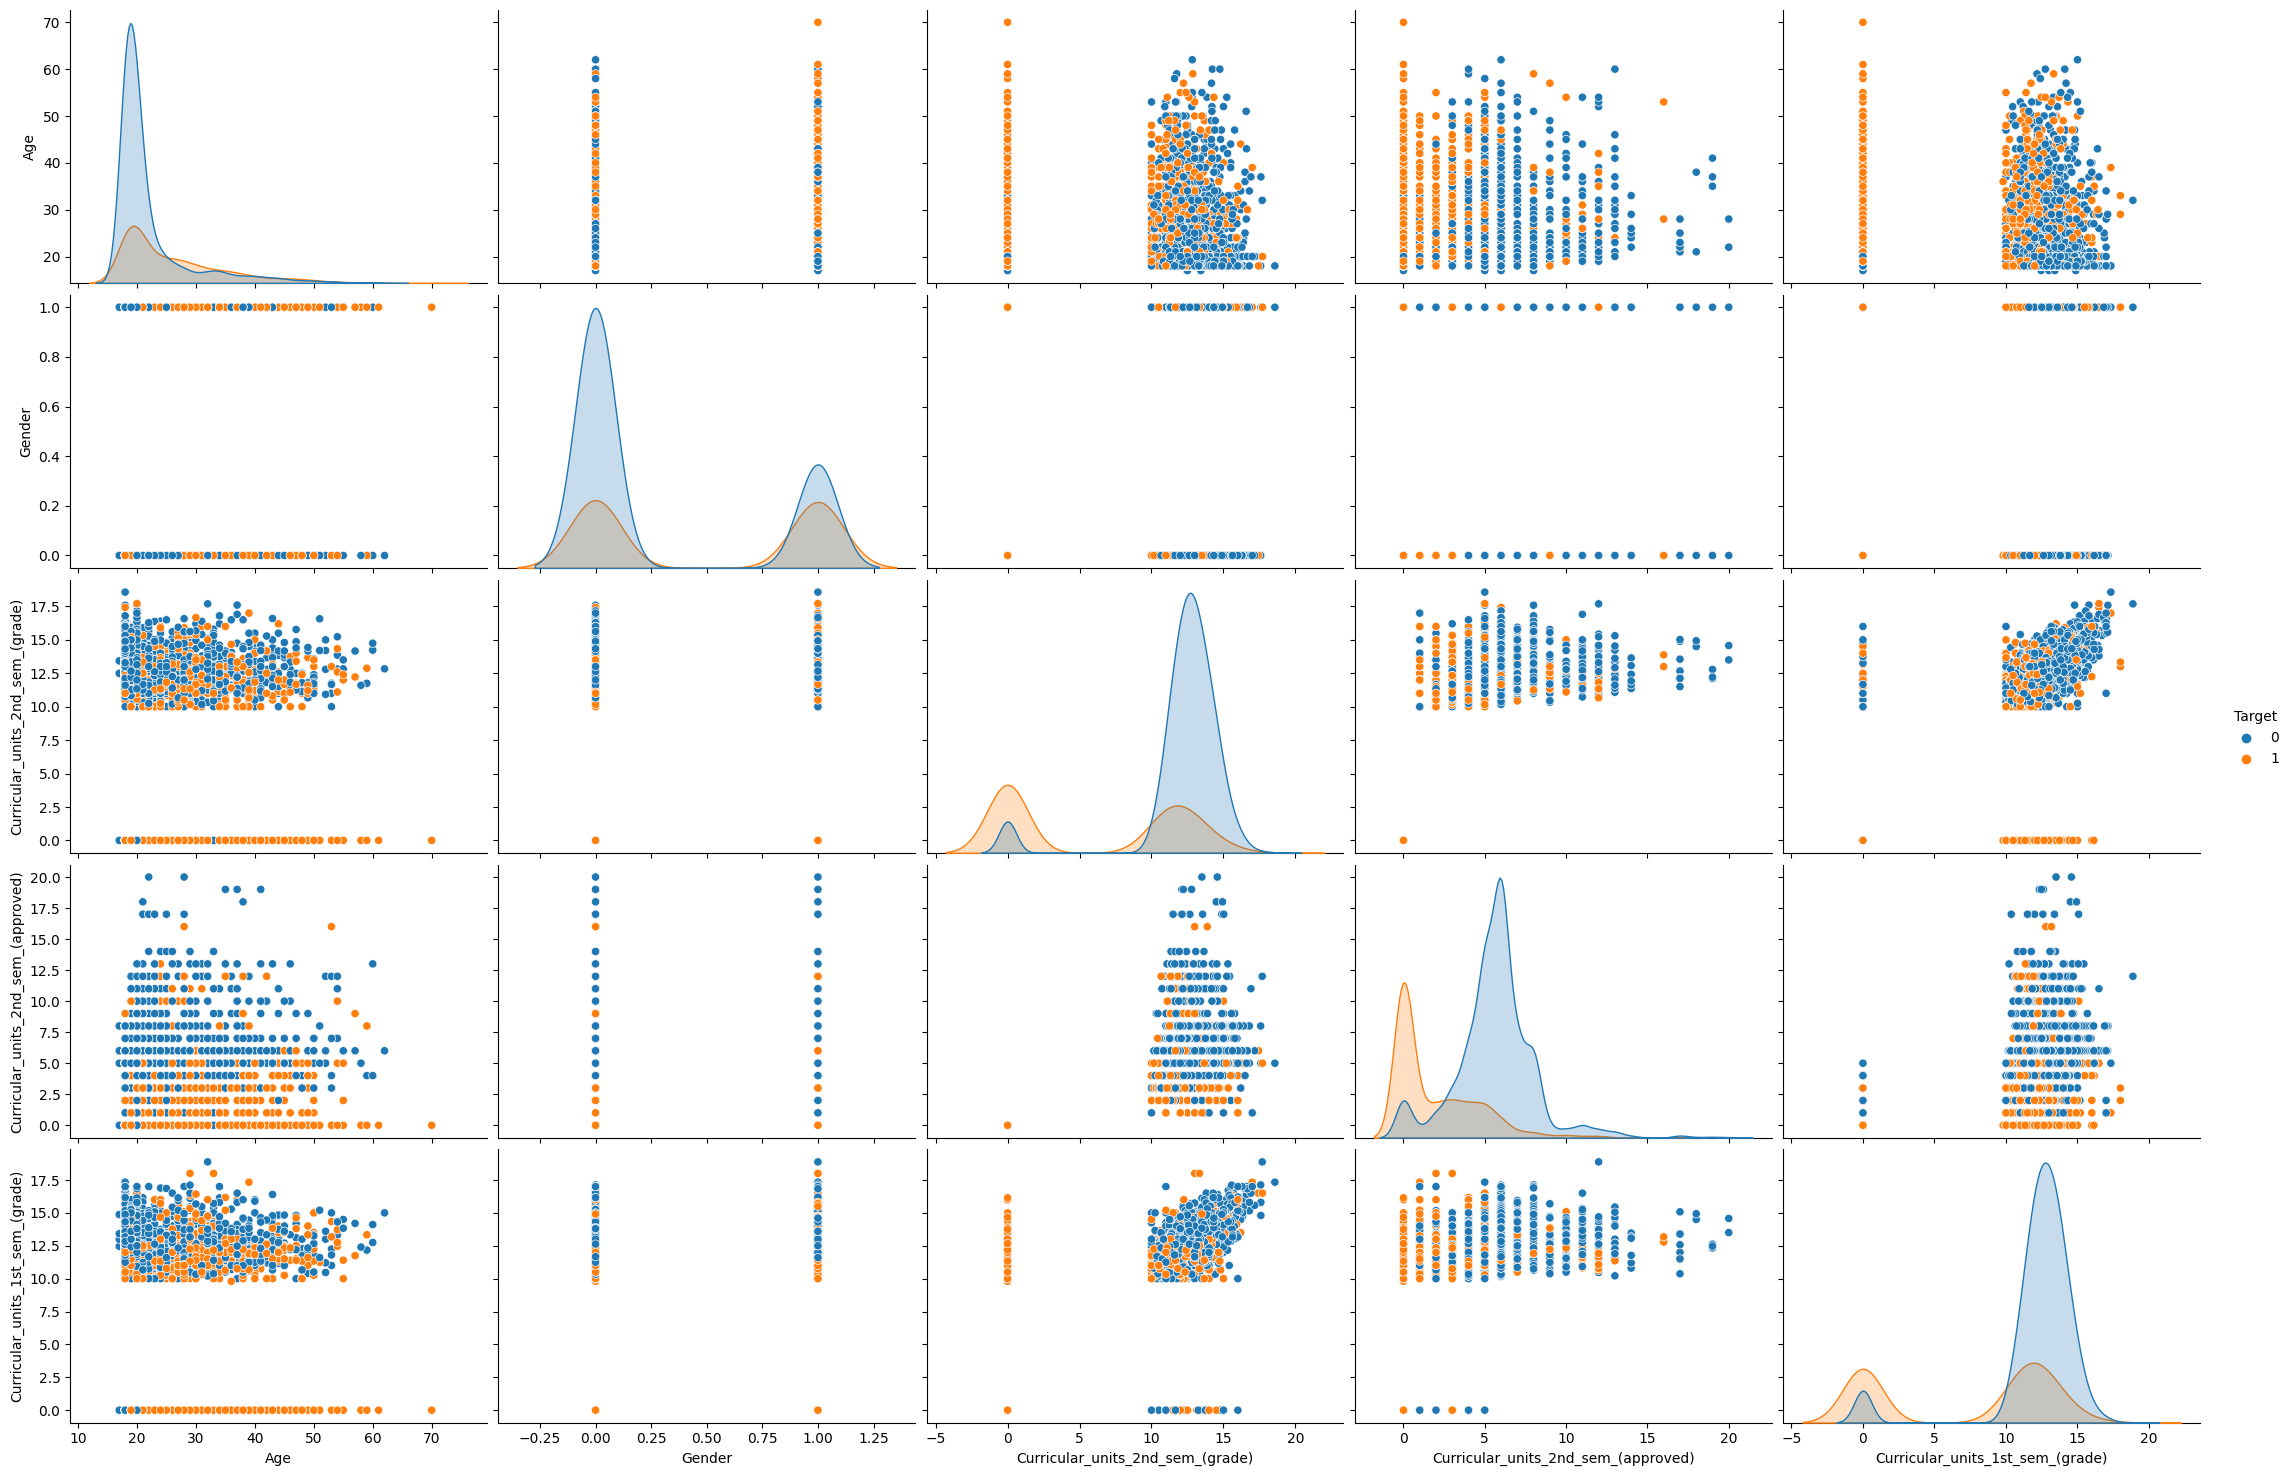

In [12]:
# Select the features for the pairplot
selected_features_for_pairplot = ['Age', 'Gender', 'Curricular_units_2nd_sem_(grade)', 'Curricular_units_2nd_sem_(approved)', 'Curricular_units_1st_sem_(grade)', 'Target']

# Create a pairplot with larger figure size
sns.pairplot(df[selected_features_for_pairplot], hue='Target', height=3, aspect=1.5)
plt.show()

In this pairwise plot we see some of the described relations with the target variable and how exactly they are distributed. In some of these picture it is possible to make out shapes of blue or orange dot clouds which indicates that it could be possible to build a model that classifies dropout or non dropouts better then a simple guessing model. 

In [13]:
# Calculate the p-values for the correlations with the target variable
p_values = df_with_dummies.apply(lambda x: pearsonr(x, df_with_dummies['Target'])[1]) # [1] returns the p-value

# Select columns with p-value less than 0.05
selected_columns = p_values[p_values < 0.05].index.drop('Target')

# Create a new DataFrame with the selected columns
df_selected = df_with_dummies[selected_columns]

# Display the new DataFrame
df_selected.head()


,Previous_qualification_(grade),Admission_grade,Age,Curricular_units_1st_sem_(enrolled),Curricular_units_1st_sem_(evaluations),Curricular_units_1st_sem_(approved),Curricular_units_1st_sem_(grade),Curricular_units_1st_sem_(without_evaluations),Curricular_units_2nd_sem_(credited),Curricular_units_2nd_sem_(enrolled),...,Mother_occupation_99,Mother_occupation_191,Father_occupation_7,Father_occupation_90,Father_occupation_99,Displaced_1,Debtor_1,Tuition_fees_up_to_date_1,Gender_1,Scholarship_holder_1
0,122.0,127.3,20,0,0,0,0.000000,0,0,0,...,False,False,False,False,False,True,False,True,True,False
1,160.0,142.5,19,6,6,6,14.000000,0,0,6,...,False,False,False,False,False,True,False,False,True,False
2,122.0,124.8,19,6,0,0,0.000000,0,0,6,...,False,False,False,False,False,True,False,False,True,False
3,122.0,119.6,20,6,8,6,13.428571,0,0,6,...,False,False,False,False,False,True,False,True,False,False
4,100.0,141.5,45,6,9,5,12.333333,0,0,6,...,False,False,False,False,False,False,False,True,False,False


 As described earlier, too keep the later computation manageable some of the variables with a lower p value of 0.05 for their correlation were dropped since it is assumed that many of the new dummy encoded variables might not be important information for the model. After trying different p values and PCA a p value of 0.05 delivered the best results. 

___
# Task 5 – Baselines and Learning Curves
Use a simple cross validation to evaluate baselines and to draw learning curves.

• Setup a simple cross validation for evaluating algorithms. Use the quality measures from
Task 1.

• Determine an appropriate simple baseline (no trained model) for your task.

• Select twoML algorithms 𝐴1 and 𝐴2 from the lectures (or their regression counterparts) and
use their implementations in scikit-learn.

• Briefly discuss relevant dataset transformations that have to be used with each of the algorithms.
Apply them in the all tasks where necessary!

• For each algorithm (𝐴1 and 𝐴2) select exactly two hyperparameters. These will be the
hyperparameters you optimize. Leave the others at default settings.

• In the simple cross validation, evaluate the baselines and build learning curves (separately for
𝐴1 and 𝐴2) with the respective two chosen hyperparameters.

• Create one visualization for each algorithm, showing the performance in different hyper-
parametrizations and comparing it to the baseline.

• Interpret the results
___

In [14]:
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.dummy import DummyClassifier
from sklearn.metrics import make_scorer, f1_score, accuracy_score
import numpy as np
from sklearn.model_selection import StratifiedKFold, RepeatedStratifiedKFold


## Evaluation Function:

We set up a simple evaluation function that takes in the classification model, the features, the targets and the number of outer folds, which is set to 10 if not specified as well as the number of repeats, that is also set to 10. the outer cross validation also stratifies the splits which is important because of the initial class imbalance that we observed. The function then returns the earlier discussed Accuracy metrics: F1 Score and Accuracy

In [15]:
def evaluate_model(model, X, y, cv=10, nr=10):
    # Define scoring metrics
    scoring_accuracy = make_scorer(accuracy_score)
    scoring_f1 = make_scorer(f1_score, pos_label=1)

    # Define RepeatedStratifiedKFold with x splits 
    skf = RepeatedStratifiedKFold(n_splits=cv, n_repeats=nr, random_state=1)
    
    # Perform cross-validation for accuracy and F1 scores
    scores_accuracy = cross_val_score(model, X, y, cv=skf, scoring=scoring_accuracy, n_jobs=-1)
    scores_f1 = cross_val_score(model, X, y, cv=skf, scoring=scoring_f1, n_jobs=-1)
    
    return scores_accuracy, scores_f1


## Baseline Model
For the Baseline model we set up two simple models that predict all dropouts or no dropouts for the entire test set. I choose two simple models that predicts both classes to get a "good" baseline F1 score as well as a "good" accuracy that future models should beat.

In [16]:
# Evaluate the baseline model that guesses all dropouts (always predicts 1)
print("Evaluating baseline model that guesses all dropouts:")
dropout_model = DummyClassifier(strategy='constant', constant=1)
scores_accuracy, scores_f1 = evaluate_model(dropout_model, df_selected, y_dummies)

# Print the accuracy and F1 scores for the baseline model
print(f"Accuracy scores: {scores_accuracy}")
print(f"Mean accuracy: {scores_accuracy.mean()}")
print(f"F1 scores for class 1: {scores_f1}")
print(f"Mean F1 score for class 1: {scores_f1.mean()}")

# Evaluate the baseline model that guesses all not dropouts (always predicts 0)
print("\nEvaluating baseline model that guesses all not dropouts:")
not_dropout_model = DummyClassifier(strategy='constant', constant=0)
scores_accuracy, scores_f1 = evaluate_model(not_dropout_model, df_selected, y_dummies)

# Print the accuracy and F1 scores for the baseline model
print(f"Accuracy scores: {scores_accuracy}")
print(f"Mean accuracy: {scores_accuracy.mean()}")
print(f"F1 scores for class 1: {scores_f1}")
print(f"Mean F1 score for class 1: {scores_f1.mean()}")


Evaluating baseline model that guesses all dropouts:
Accuracy scores: [0.3227991  0.32054176 0.32054176 0.32054176 0.32126697 0.32126697
 0.32126697 0.32126697 0.32126697 0.32126697 0.3227991  0.32054176
 0.32054176 0.32054176 0.32126697 0.32126697 0.32126697 0.32126697
 0.32126697 0.32126697 0.3227991  0.32054176 0.32054176 0.32054176
 0.32126697 0.32126697 0.32126697 0.32126697 0.32126697 0.32126697
 0.3227991  0.32054176 0.32054176 0.32054176 0.32126697 0.32126697
 0.32126697 0.32126697 0.32126697 0.32126697 0.3227991  0.32054176
 0.32054176 0.32054176 0.32126697 0.32126697 0.32126697 0.32126697
 0.32126697 0.32126697 0.3227991  0.32054176 0.32054176 0.32054176
 0.32126697 0.32126697 0.32126697 0.32126697 0.32126697 0.32126697
 0.3227991  0.32054176 0.32054176 0.32054176 0.32126697 0.32126697
 0.32126697 0.32126697 0.32126697 0.32126697 0.3227991  0.32054176
 0.32054176 0.32054176 0.32126697 0.32126697 0.32126697 0.32126697
 0.32126697 0.32126697 0.3227991  0.32054176 0.32054176 0.3

## A1: SVM Evaluation 
The first ML algorithm that I am going to evaluate is the Support Vector Machine (SVM) with a polynomial kernel. For this algorithm, it is important to scale the data before training because features with larger values would otherwise impact the computation more without necessarily being more important. Scaling ensures that all features contribute equally to the model by standardizing their ranges.

The two hyperparameter chosen for the algorithm are:
* Polynomial Degree: Determines the complexity of the transformation of the data into a higher-dimensional space. A higher degree allows the model to capture more intricate patterns, but it may also increase the risk of overfitting.
* C Value: C controls the balance between training accuracy and model simplicity. A smaller C favors a simpler model, while a larger C focuses on accurately classifying training data, even if it reduces generalization.



In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import learning_curve

In [19]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_selected)

# Define the degrees and C values to evaluate
degrees = [1, 2, 3, 4, 5] 
C_values = [0.1, 1, 10, 25, 50, 75, 100, 500]

# Initialize a list to store the results
svm_results = []


# Iterate over the degrees and C values
for degree in degrees:
    for C in C_values:
        # Create the SVM model with the current degree and C value
        svm_model = SVC(kernel='poly', degree=degree, C=C)
        
        # Evaluate the model
        # print(f"Evaluating SVM with polynomial kernel of degree {degree} and C={C}:")
        scores_accuracy, scores_f1 = evaluate_model(svm_model, X_scaled, y_dummies, cv=2)
        
        # # Print the accuracy and F1 scores for the current setting
        # print(f"Accuracy scores: {scores_accuracy}")
        # print(f"Mean accuracy: {scores_accuracy.mean()}")
        # print(f"F1 scores for class 1: {scores_f1}")
        # print(f"Mean F1 score for class 1: {scores_f1.mean()}")
        # print("\n")
                
        # Append the results to the list
        svm_results.append({
            'degree': degree,
            'C': C,
            'mean_accuracy': scores_accuracy.mean(),
            'mean_f1': scores_f1.mean(),
             })

# Convert the results to a DataFrame
svm_results_df = pd.DataFrame(svm_results)


In [20]:
# df with the Hyperparameter results
print(svm_results_df)


    degree      C  mean_accuracy   mean_f1
0        1    0.1       0.849322  0.734051
1        1    1.0       0.869552  0.769690
2        1   10.0       0.872966  0.781395
3        1   25.0       0.873079  0.782180
4        1   50.0       0.873237  0.782710
5        1   75.0       0.873237  0.782726
6        1  100.0       0.873214  0.782714
7        1  500.0       0.873192  0.782837
8        2    0.1       0.747988  0.377143
9        2    1.0       0.822581  0.655155
10       2   10.0       0.815145  0.678893
11       2   25.0       0.799254  0.662302
12       2   50.0       0.783567  0.643121
13       2   75.0       0.774458  0.631384
14       2  100.0       0.767902  0.624361
15       2  500.0       0.742925  0.598415
16       3    0.1       0.735940  0.322174
17       3    1.0       0.815552  0.628521
18       3   10.0       0.838630  0.715150
19       3   25.0       0.833409  0.716835
20       3   50.0       0.827509  0.711568
21       3   75.0       0.822943  0.706546
22       3 

The table at the end describes each models mean accuracy and the mean f1 score over all 10 splits and 10 repeats

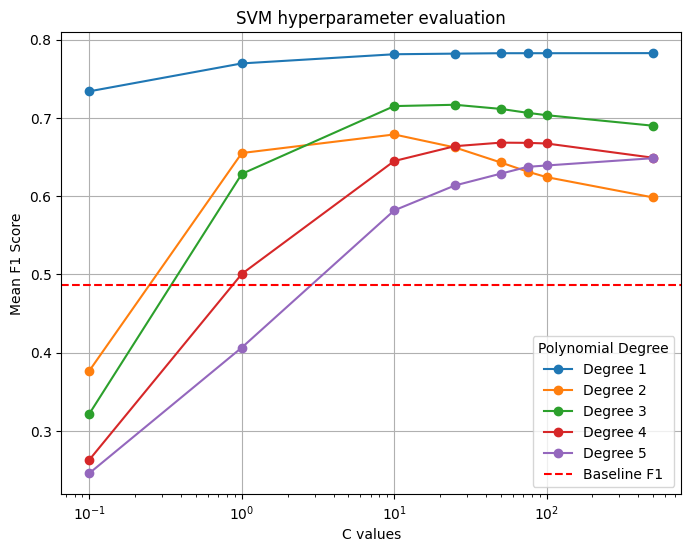

In [21]:
plt.figure(figsize=(8, 6))
for degree in degrees:
    degree_results = svm_results_df[svm_results_df['degree'] == degree]
    plt.plot(degree_results['C'], degree_results['mean_f1'], marker='o', label=f'Degree {degree}')
baseline_f1 = 0.48622742456172907
plt.axhline(y=baseline_f1, color='r', linestyle='--', label='Baseline F1')
plt.xlabel('C values')
plt.ylabel('Mean F1 Score')
plt.title('SVM hyperparameter evaluation')
plt.xscale('log')
plt.legend(title='Polynomial Degree')
plt.grid(True)
plt.show()


In [22]:
# Find the configuration with the highest mean F1 score
best_config = svm_results_df.loc[svm_results_df['mean_f1'].idxmax()]

# Extract the best degree and C values
best_degree = int(best_config['degree'])
best_C = best_config['C']

# Create the SVM model with the best configuration
best_svm_model = SVC(kernel='poly', degree=best_degree, C=best_C)

# Compute the learning curve for the best model
train_sizes, train_scores, val_scores = learning_curve(
    best_svm_model, X_scaled, y_dummies, cv=3, scoring='f1', n_jobs=-1
)



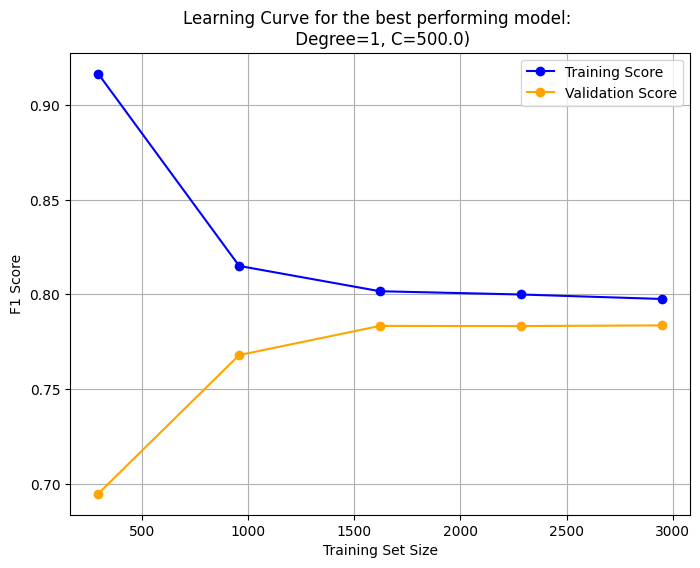

In [23]:
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_scores.mean(axis=1), 'o-', label='Training Score', color='blue')
plt.plot(train_sizes, val_scores.mean(axis=1), 'o-', label='Validation Score', color='orange')
plt.title(f'Learning Curve for the best performing model: \n Degree={best_degree}, C={best_C})')
plt.xlabel('Training Set Size')
plt.ylabel('F1 Score')
plt.legend(loc='best')
plt.grid(True)
plt.show()

## Random forrest evaluation:
The second ML algorithm we evaluate is the Random Forest classifier. Random Forests are ensemble methods that build multiple decision trees with different feature selection and sample selection during training and combine their outputs for prediction, which tends to perform better then having a single decision tree. For this algorithm no scaling is necessary because it only compares the feature values within a feature and not between features.  

For this algorithm, we tune these two hyperparameter:

* Number of Trees (n_estimators): Determines the number of decision trees in the forest. A larger number of trees generally leads to more stable and robust predictions but increases training time.
* Maximum Tree Depth (max_depth): Controls the depth of each decision tree. Shallower trees limit model complexity, reducing overfitting but potentially underfitting the data. Deeper trees can capture more details in the data but may overfit, especially when combined with small datasets.

In [24]:
from sklearn.ensemble import RandomForestClassifier

In [25]:
# Define the number of trees and tree depths to evaluate
n_trees = [10, 50, 100, 200, 400, 500]
tree_depths = [5, 10, 15, 20, 30, 40, 50]

# Initialize a list to store results and learning curve data
rf_results = []
rf_learning_curves = []

# Iterate over the number of trees and tree depths
for n in n_trees:
    for depth in tree_depths:
        # Create the Random Forest model with the current number of trees and tree depth
        rf_model = RandomForestClassifier(n_estimators=n, max_depth=depth, random_state=1)
        
        # Evaluate the model
        # print(f"Evaluating Random Forest with {n} trees and depth {depth}:")
        scores_accuracy, scores_f1 = evaluate_model(rf_model, X_scaled, y_dummies, cv=10)
        
        # # Print the accuracy and F1 scores for the current setting
        # print(f"Accuracy scores: {scores_accuracy}")
        # print(f"Mean accuracy: {scores_accuracy.mean()}")
        # print(f"F1 scores for class 1: {scores_f1}")
        # print(f"Mean F1 score for class 1: {scores_f1.mean()}\n")     
        # print("\n")

        # Save the results to the list, including mean training score
        rf_results.append({
            'n_trees': n,
            'tree_depth': depth,
            'mean_accuracy': scores_accuracy.mean(),
            'mean_f1': scores_f1.mean(),
        })

# Convert the results to a DataFrame
rf_results_df = pd.DataFrame(rf_results)




In [26]:
# df with the Hyperparameter results
print(rf_results_df)


    n_trees  tree_depth  mean_accuracy   mean_f1
0        10           5       0.852077  0.739887
1        10          10       0.864328  0.766036
2        10          15       0.862092  0.765291
3        10          20       0.859695  0.758500
4        10          30       0.860170  0.756706
5        10          40       0.860238  0.756507
6        10          50       0.860260  0.756559
7        50           5       0.855897  0.747041
8        50          10       0.871743  0.777976
9        50          15       0.872669  0.782343
10       50          20       0.872851  0.783514
11       50          30       0.871969  0.781332
12       50          40       0.872241  0.781709
13       50          50       0.872173  0.781603
14      100           5       0.857502  0.749196
15      100          10       0.872354  0.779090
16      100          15       0.874749  0.785365
17      100          20       0.874274  0.785658
18      100          30       0.874026  0.785193
19      100         

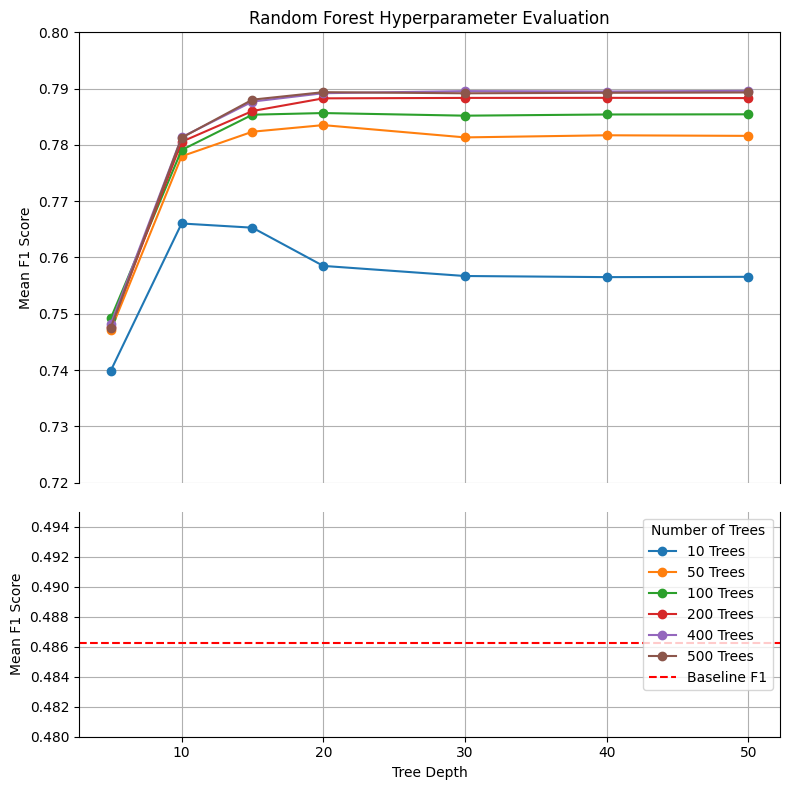

In [29]:
# Create figure with custom gridspecification
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 8), sharex=True, gridspec_kw={'height_ratios': [2, 1]})

# Loop through each unique number of trees
for n in rf_results_df['n_trees'].unique():
    # Filter results for the current number of trees
    n_tree_results = rf_results_df[rf_results_df['n_trees'] == n]
    
    # Plot F1 scores
    ax1.plot(n_tree_results['tree_depth'], n_tree_results['mean_f1'], marker='o', label=f'{n} Trees')
    ax2.plot(n_tree_results['tree_depth'], n_tree_results['mean_f1'], marker='o', label=f'{n} Trees')

# Add baseline F1 score as horizontal line
baseline_f1 = 0.48622742456172907
ax2.axhline(y=baseline_f1, color='r', linestyle='--', label='Baseline F1')

# Set y-limits for both axes
ax1.set_ylim(0.72, 0.80)
ax2.set_ylim(0.48, 0.495)

# Hide spines between the subplots and set x-tick labels only on bottom subplot
ax1.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax1.tick_params(axis='x', bottom=False, labelbottom=False)
ax2.xaxis.tick_bottom()

# Add labels and title
ax2.set_xlabel('Tree Depth')
ax1.set_ylabel('Mean F1 Score')
ax2.set_ylabel('Mean F1 Score')
ax1.set_title('Random Forest Hyperparameter Evaluation')

# Add grid and legend
ax1.grid(True)
ax2.grid(True)
ax2.legend(title='Number of Trees')

# Show the plot
plt.tight_layout()
plt.show()


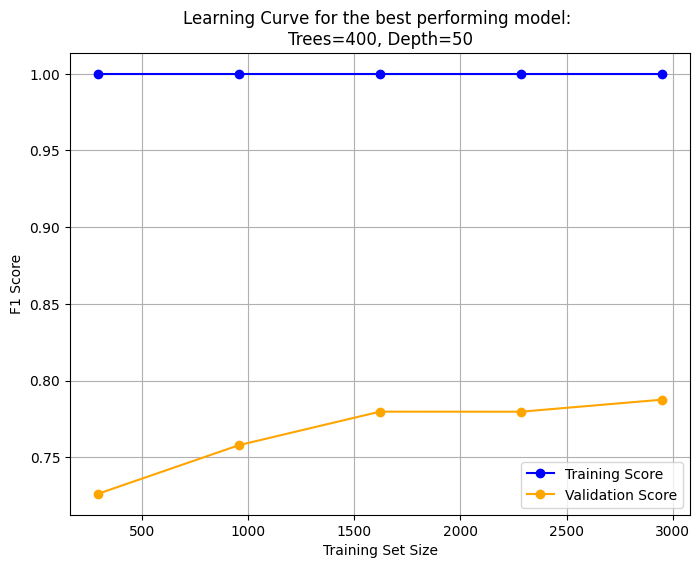

In [30]:
# Get the best model based on F1 score
best_rf_model_params = rf_results_df.loc[rf_results_df['mean_f1'].idxmax()]
best_n_trees = int(best_rf_model_params['n_trees'])  # Ensure it's an integer
best_tree_depth = int(best_rf_model_params['tree_depth'])  # Ensure it's an integer

# Compute the learning curve for the best model
best_rf_model = RandomForestClassifier(n_estimators=best_n_trees, max_depth=best_tree_depth, random_state=1)
train_sizes, train_scores, val_scores = learning_curve(
    best_rf_model, X_scaled, y_dummies, cv=3, scoring='f1', n_jobs=-1
)

# Plot the learning curve
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_scores.mean(axis=1), 'o-', label='Training Score', color='blue')
plt.plot(train_sizes, val_scores.mean(axis=1), 'o-', label='Validation Score', color='orange')
plt.title(f'Learning Curve for the best performing model: \nTrees={best_n_trees}, Depth={best_tree_depth}')
plt.xlabel('Training Set Size')
plt.ylabel('F1 Score')
plt.legend(loc='best')
plt.grid(True)
plt.show()


# Interpretation:  

To ensure stable results, all evaluations used cross-validation with 10 folds and 10 repeats as described in the evaluation function.  

### Baseline:  
Two simple models were used as baselines to establish scores that the proposed models need to beat.  
1. **No Dropouts Model**: This model predicts no dropouts for all cases. It achieves an accuracy of 67.8% but an F1 score of 0, as it never correctly predicts a dropout.  
2. **All Dropouts Model**: This model predicts dropouts for all cases. It achieves a lower accuracy of 31.1% but a higher F1 score of 0.486, as it correctly predicts some dropouts.  

For a model to be considered effective, it should achieve a higher accuracy than the "No Dropouts" baseline and a higher F1 score than the "All Dropouts" baseline.  

### SVM:  
The results of the SVM models varied depending on the hyperparameter selection. From the figure: SVM Hyperparameter selection we see that Most models outperformed the baseline models. From the F1 score graph, it appears that performance improves with larger `C` values but drops off at a `C` value of 100 for models with a degree >1. The polynomial degree significantly impacts performance, with the smallest degree of 1 achieving the best results. The best-performing SVM model achieved an F1 score of 0.7828 and an accuracy of 0.8732 with a polynomial degree of 1 and a `C` value of 500. The polynomal degree of one seems to plateau after reaching a `C` value of 100. These metrics will be further evaluated with nested cross validation in the next task. From the learning curve of the best model we see that both testing and training f1 scores plateau after 2000 training instances. The train score decreased with further training samples and the test score increased, which is a good sign since it signals that we have sufficient training data for that specific algorithm.  

### Random Forest:  
The Random Forest model showed consistent improvement in performance with an increasing number of trees (`n_trees`) and maximum tree depth (`tree_depth`). In the figure we see that Models with more trees generally performed better, with 400 trees yielding the best results. Shallower trees (e.g., depth 5) performed worse due to underfitting, while deeper trees (15–50) lead to better accuracy and F1 scores. The best-performing model had 400 trees and a maximum depth of 50, achieving a mean accuracy of 0.8766 and a mean F1 score of 0.7896. From the Learningcurve of that model we can see that the models predicts the training data perfectly, scoring close to 1 in regards to the f1 score, but the validation score still seemed to increase with further training data. These metrics will also be further evaluated in the next task. 

These results will be used to select a hyperparametergrid to find the best hyperparameters and evaluate the F1 score and Accuracy in a nested cross validation. 


___
# Task 6 – Nested Cross Validation
Setup a proper nested cross validation experiment to assess and compare the performance of different
algorithms (incl. the baseline) chosen in Task 5.

• For each of the two ML algorithms 𝐴1 and 𝐴2, create a reasonable hyperparameter grid using
the respective two hyperparameters you chose above. Select the value ranges in the grid based
on the results in Task 5.

• Use those grids in nested cross validations to find the optimal parameter settings.

• Compare train and test performance during the outer cross validation and interpret the results.

• Compare your final performance estimates of the algorithms and the baseline in a table using
the two quality functions you selected in Task 1.

• Discuss your results and express a recommendation with regard to the choice of models. Pick
one model as the final model for the task.
___

Using nested cross validation to evaluate the best working model for svm and random forrest:

In [31]:
from sklearn.model_selection import GridSearchCV

In [33]:
# Define the SVM model
svm_model = SVC(kernel='poly')

# Hyperparameter grid
svm_grid = {'C': [1, 5, 10, 25, 50, 75, 100], 
            'degree': [1, 2, 3, 4]}

# GridSearchCV for hyperparameter selection
svm_grid_cv = GridSearchCV(
    estimator=svm_model, 
    param_grid=svm_grid, 
    cv=RepeatedStratifiedKFold(n_splits=10, n_repeats=10, random_state=1), 
    n_jobs=-1, 
    scoring=make_scorer(f1_score, pos_label=1)
)


# Perform nested cross-validation with training and testing performance
scoring = {'accuracy': 'accuracy', 'f1_class1': make_scorer(f1_score, pos_label=1)}
outer_cv_results = cross_validate(
    estimator=svm_grid_cv,
    X=X_scaled,
    y=y_dummies,
    cv=StratifiedKFold(n_splits=10),
    scoring=scoring,
    return_train_score=True,
    n_jobs=-1
)

# Extract train and test scores
train_accuracy = outer_cv_results['train_accuracy']
test_accuracy = outer_cv_results['test_accuracy']
train_f1 = outer_cv_results['train_f1_class1']
test_f1 = outer_cv_results['test_f1_class1']

# Print comparison of train vs test scores
print("Train vs Test Accuracy:")
print(f"Train Accuracy: {train_accuracy.mean():.4f} ± {train_accuracy.std():.4f}")
print(f"Test Accuracy: {test_accuracy.mean():.4f} ± {test_accuracy.std():.4f}\n")

print("Train vs Test F1 Scores for Class 1:")
print(f"Train F1 Score: {train_f1.mean():.4f} ± {train_f1.std():.4f}")
print(f"Test F1 Score: {test_f1.mean():.4f} ± {test_f1.std():.4f}")



Train vs Test Accuracy:
Train Accuracy: 0.8801 ± 0.0018
Test Accuracy: 0.8743 ± 0.0162

Train vs Test F1 Scores for Class 1:
Train F1 Score: 0.7934 ± 0.0039
Test F1 Score: 0.7833 ± 0.0273


In [35]:
# Define the Random Forest model
rf_model = RandomForestClassifier(random_state=1)

# Hyperparameter grid
rf_grid = {'n_estimators': [10, 50, 100, 200, 400, 500], 
           'max_depth': [5, 10, 15, 20, 30, 40, 50]}

# GridSearchCV for hyperparameter selection
rf_grid_cv = GridSearchCV(
    estimator=rf_model, 
    param_grid=rf_grid, 
    cv=RepeatedStratifiedKFold(n_splits=10, n_repeats=10, random_state=1), 
    n_jobs=-1, 
    scoring=make_scorer(f1_score, pos_label=1)
)


# Perform nested cross-validation with training and testing performance
scoring = {'accuracy': 'accuracy', 'f1_class1': make_scorer(f1_score, pos_label=1)}
outer_cv_results = cross_validate(
    estimator=rf_grid_cv,
    X=df_selected,
    y=y_dummies,
    cv=StratifiedKFold(n_splits=10),
    scoring=scoring,
    return_train_score=True,
    n_jobs=-1
)

# Extract train and test scores
train_accuracy = outer_cv_results['train_accuracy']
test_accuracy = outer_cv_results['test_accuracy']
train_f1 = outer_cv_results['train_f1_class1']
test_f1 = outer_cv_results['test_f1_class1']

# Print comparison of train vs test scores
print("Train vs Test Accuracy:")
print(f"Train Accuracy: {train_accuracy.mean():.4f} ± {train_accuracy.std():.4f}")
print(f"Test Accuracy: {test_accuracy.mean():.4f} ± {test_accuracy.std():.4f}\n")

print("Train vs Test F1 Scores for Class 1:")
print(f"Train F1 Score: {train_f1.mean():.4f} ± {train_f1.std():.4f}")
print(f"Test F1 Score: {test_f1.mean():.4f} ± {test_f1.std():.4f}")




Train vs Test Accuracy:
Train Accuracy: 0.9992 ± 0.0023
Test Accuracy: 0.8759 ± 0.0171

Train vs Test F1 Scores for Class 1:
Train F1 Score: 0.9988 ± 0.0036
Test F1 Score: 0.7888 ± 0.0266


## Model Performance Comparison
Here is a comparison of the performance of the **baseline models**, **SVM**, and **Random Forest** using **Accuracy** and **F1 Score** for class 1. The metrics have been averaged across outer cross-validation folds:

| **Model** | **Mean Accuracy** | **Mean F1 Score (Class 1)** |
|----------------------------------|-------------------|----------------------------|
| **SVM** | 0.8745 | 0.7839 |
| **Random Forest** | 0.8763 | 0.7903 |
| **Baseline (All Dropouts)** | 0.3212 | 0.4862 |
| **Baseline (All Not Dropouts)** | 0.6788 | 0.0000 |

### Discussion
- **Random Forest** achieved the highest **accuracy** (0.8763) and **F1 score for class 1** (0.7903). This suggests that the Random Forest model works best for this classification task since it achieves the best scores in both metrics.
- **SVM** is very close to the Random Forest in terms of **accuracy** (0.8745) and **F1 score** (0.7839). Although it performs slightly worse than the Random Forest in this task, SVM accuracies are very close to the Random Forest and could be considered if other metrics would be evaluated as well, like the computational time or the variance of the results.

### Recommendation
Based on the results, I recommend using **Random Forest** as the final model for this task. While **SVM** is a close second, **Random Forest** performs a little bit better und since accuracy and f1 score are the only metrics that are evaluated, Random Forest performs the best. For the Hyperparameter selection I would usually, after the cross validation, conduct another gridsearch for the Random Forest with only outer cross validation, since our nested cross validation only had the goal to determine the algorithms performance across different folds. But since we already evaluated different hyperparameters in our initial task, we can select the best performing Random Forest model from that task, which had a Degree of 1 and a C value of 75. This will be the model that I recommend for further analysis.

___
# Task 7 – Analysis of the Final Model
Evaluate and discuss your final model with respect to the individual predictions. Conduct the analysis
in the outer cross validation from Task 6. Find a way to combine the results on different folds in
a visualization. You may use several visualizations, but each visualization should be based on the
evaluation on all folds.

• In case of classification, analyze how well the different individual classes are retrieved and
predicted.

• In case of regression, analyze the residuals and their relation to feature distributions.
___

## Final Model Evaluation and Discussion

### Model Evaluation

In task 2. The **Random Forest** model was tuned using GridSearchCV, and the best parameters found were `n_estimators = 400` and `max_depth = 50`. After fitting, the best **Random Forest** model achieved the following performance metrics:
  
- **Mean Accuracy**: 0.876626
- **Mean F1 Score for Class 1**: 0.789602

These results show that the Random Forest performs well in distinguishing between the dropout and non-dropout classes, with a relatively high accuracy and a solid F1 score for class 1.

### 1. Outer Cross-Validation Analysis

For the final model I also plotted the training and test F1 scores for the 10 different folds to see how they changed with different sample selection.

### 2. Confusion Matrix Visualization
A confusion matrix will help us understand the number of true positives, false positives, true negatives, and false negatives for each fold. We do this to see what groups the model actually predicts best or where it still struggles.

In [142]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [143]:
# Create DataFrame to display fold-wise scores
fold_scores = pd.DataFrame({
    'Fold': range(1, len(train_accuracy) + 1),
    'Train Accuracy': train_accuracy,
    'Test Accuracy': test_accuracy,
    'Train F1': train_f1,
    'Test F1': test_f1
})

# Format the scores to 4 decimal places
fold_scores = fold_scores.round(4)

# Display the DataFrame
print("Fold-wise Performance Metrics:")
print(fold_scores)

Fold-wise Performance Metrics:
   Fold  Train Accuracy  Test Accuracy  Train F1  Test F1
0     1             1.0         0.8736       1.0   0.7829
1     2             1.0         0.8939       1.0   0.8213
2     3             1.0         0.8849       1.0   0.8016
3     4             1.0         0.8984       1.0   0.8249
4     5             1.0         0.8824       1.0   0.8045
5     6             1.0         0.8394       1.0   0.7418
6     7             1.0         0.8778       1.0   0.7907
7     8             1.0         0.8891       1.0   0.8078
8     9             1.0         0.8552       1.0   0.7557
9    10             1.0         0.8688       1.0   0.7717


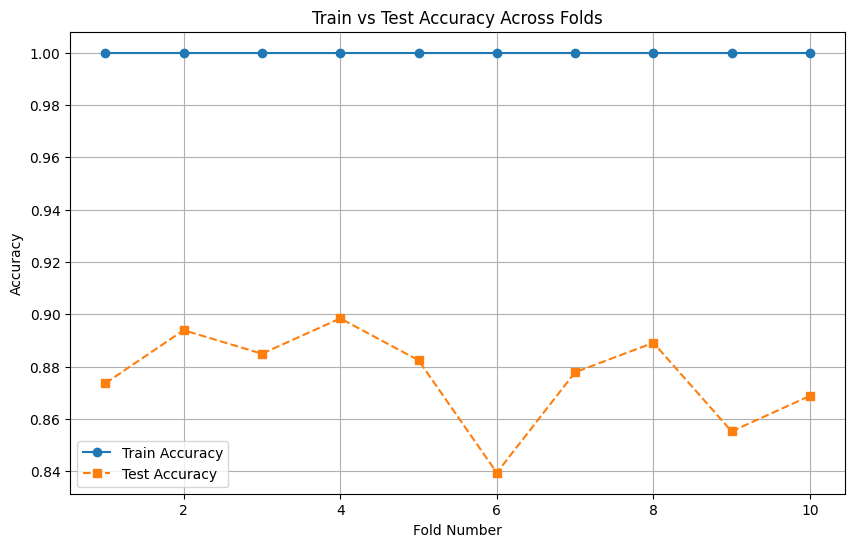

In [144]:
# Plotting train vs test accuracy
plt.figure(figsize=(10, 6))
plt.plot(fold_scores['Fold'], fold_scores['Train Accuracy'], marker='o', label='Train Accuracy')
plt.plot(fold_scores['Fold'], fold_scores['Test Accuracy'], marker='s', label='Test Accuracy', linestyle='--')

plt.xlabel('Fold Number')
plt.ylabel('Accuracy')
plt.title('Train vs Test Accuracy Across Folds')
plt.legend()
plt.grid(True)
plt.show()


# 1. Outer cross validation analysis:

from the outer out cross validation plot we can see that the model seems to overfit the data with training scores always 1 or very close to 1, while the test accuracy varies around .9 and .84. This indicates that even with stratification the sample selection still plays a major roll. Depending on the splits we would either choose the SVM model instead of the random forrest. This should be kept in mind if this model were to be applied, that the results might vary depending on the students that are being analyzed. 

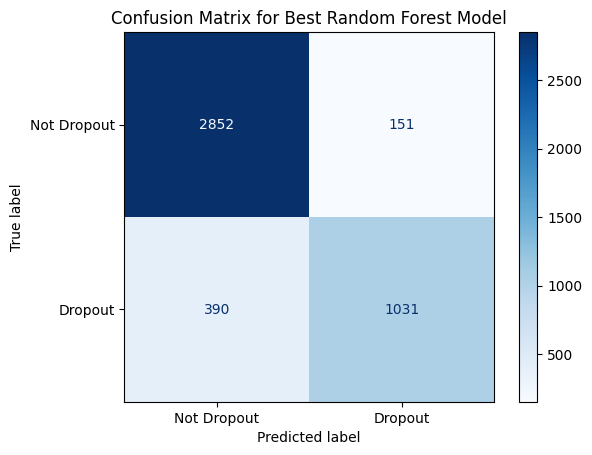

In [145]:
# Define the best Random Forest model
best_rf_model = RandomForestClassifier(n_estimators=400, max_depth=50, random_state=1)

cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
y_true, y_pred = [], []

for train_index, test_index in cv.split(X_scaled, y_dummies):
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y_dummies[train_index], y_dummies[test_index]

    # Fit the best Random Forest model and predict
    best_rf_model.fit(X_train, y_train)
    y_pred_fold = best_rf_model.predict(X_test)
    
    y_true.extend(y_test)
    y_pred.extend(y_pred_fold)

# Generate confusion matrix
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Dropout', 'Dropout'])
disp.plot(cmap=plt.cm.Blues)
plt.title(f"Confusion Matrix for Best Random Forest Model")
plt.show()


# 2. Confusion Matrix analysis:

In the confusion matrix we see, that the number of True negative predictions is the highest after the True positive predictions, which is generally a good sign. For the wrong predictions we see that 
most people who are falsy predicted are False positives. This indicates that we this model was applied it might not identify people who want to dropout which is not ideal. since the F1 score doesn't give the precision or recall more meaning the classes are equally balanced. 

---

# Task 8 – Conclusions and Future Work

1. **Summarize and interpret the achieved results**  
   In this notebook, I evaluated multiple models to classify student dropouts and achieved results that outperformed my initial baseline model of guessing either all dropouts or all non-dropouts. After evaluating two different ML algorithms using nested folded cross-validation for hyperparameter tuning and evaluating their performance, both outperformed the baseline model by a significant margin and performed similarly in regard to their accuracy and F1 score. In the end, the support vector machine outperformed with better accuracy and F1 score. Looking at the train and test F1 scores, the best scoring random forest model still overfit the data, with an F1 score close to 1 in the training and only 0.78 in the test. But, from the confusion matrix we see that the model has quite a large amount of false positives compared to false negatives which is problematic because it means that a high amount of students that are going to drop out won't be predicted as dropouts by the model.

2. **Explain the generated value within the context of your task**  
   The value of this work lies in the context described in the first task, which is to help identify students at high risk of dropping out to provide individual help. The challenges for this are that we assume dropping out of a specific university program is something we want to avoid.

3. **Propose ideas for future work**  
   For future work, different algorithms could yield even better results. Tree-based algorithms that are less prone to overfitting could work well for this data since the random forest already performed well but had a problem with overfitting. Algorithms like XGBoost or LightGBM could potentially outperform the SVM or random forest. The trend of the performance of the best-performing random forest models also seems to keep improving with a larger dataset. Acquiring this data could further improve the performance. The best-performing SVM models seem to plateau with the current training sample size. I would also highly suggest to choose more then two metrics to determin modelchoice. For the sake of this project I only choose two, but in a real life scenario I would also at the most look at the computation time and variance of the selected models. This would have yielded very different results since the two best performing models of this work are very highly computational compared to the value that they bring in terms of accuracy. Lastly but also important; depending on the usecase, universities should choose which metric is more important for them: the Precision of the model or the recall. Depending on that the F1 score on which the model selection took place, could be weighted to give more importance to the false negatives or false positives. 

4. **Critically reflect and assess the usability of the applied methodology in your context**  
   Even though the results of this classification yielded good performance, the applicability of this is limited. Some of the features, like the students' debt, their grade, and the acquired credits, which have the highest correlation with the target variable and most likely play a big role in the models performance, are all variables that will only be known after a certain time period. Correctly classifying these students, who might have already dropped out months ago, doesn't bring any value to the student or university. A different model that is trained without these features could be evaluated as well to predict the students at high dropout risk as early as possible.  
   Another limitation of this task is the general question of whether stopping students from dropping out of university programs is actually as valuable as initially described. Assuming that finishing a university degree instead of learning elsewhere seems too simplistic and might even put students into more debt with a degree in a field they don't want to further pursue. Stopping early and finding a more interesting field of work might be more useful for many students as well as the universities.

___
